# Classification Task for COVID-19 Detection in Blood Exams

In [ ]:
# Imports

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import svm, ensemble

## Data Analysis

### Data Subdivision
- *Training set*: merge of data fragments 1, 2, 3, 4, and 5 (27,960 instances, ~70%)
- *Validation set*: data fragment 7 (5,648 instances, ~14%)
- *Test set*: data fragment 6 (6,436 instances, ~16%)

All partitions are perfectly balanced

In [ ]:
# Read training set
training_set = pd.read_csv(os.path.join("Data", "training_set.csv"), compression=None)

# Read validation set
validation_set = pd.read_csv(os.path.join("Data", "validation_set.csv"), compression=None)

# Read test set
test_set = pd.read_csv(os.path.join("Data", "test_set.csv"), compression=None)

In [ ]:
print("Training set shape:", training_set.shape)
print("Validation set shape:", validation_set.shape)
print("Test set shape:", test_set.shape)

Training set shape: (27960, 12211)
Validation set shape: (5648, 12211)
Test set shape: (6436, 12211)


Class distribution


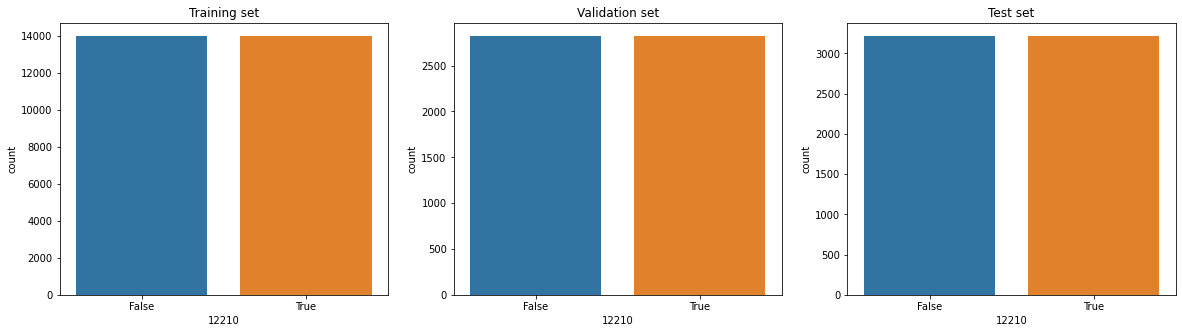

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(ax=ax[0], x="12210", data=training_set)
ax[0].set_title("Training set")

sns.countplot(ax=ax[1], x="12210", data=validation_set)
ax[1].set_title("Validation set")

sns.countplot(ax=ax[2], x="12210", data=test_set)
ax[2].set_title("Test set")

print("Class distribution")

In [ ]:
training_set  # Training set overview

,0,1,2,3,4,5,6,7,8,9,...,12201,12202,12203,12204,12205,12206,12207,12208,12209,12210
0,0.823529,0.823529,0.823529,0.823529,0.823529,0.827451,0.835294,0.839216,0.843137,0.843137,...,0.749020,0.745098,0.741176,0.741176,0.741176,0.741176,0.741176,0.741176,0.745098,True
1,0.886275,0.894118,0.901961,0.898039,0.890196,0.882353,0.874510,0.874510,0.874510,0.878431,...,0.815686,0.819608,0.823529,0.823529,0.823529,0.823529,0.819608,0.811765,0.815686,True
2,0.976471,0.980392,0.980392,0.980392,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.843137,0.843137,0.843137,0.839216,0.835294,0.831373,0.831373,0.831373,0.823529,True
3,0.854902,0.854902,0.850980,0.847059,0.843137,0.843137,0.843137,0.847059,0.847059,0.847059,...,0.756863,0.756863,0.752941,0.752941,0.749020,0.745098,0.741176,0.737255,0.733333,True
4,0.972549,0.968627,0.968627,0.972549,0.976471,0.976471,0.972549,0.968627,0.972549,0.968627,...,0.960784,0.956863,0.949020,0.941176,0.941176,0.941176,0.949020,0.952941,0.956863,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27955,0.929412,0.929412,0.933333,0.937255,0.941176,0.949020,0.952941,0.956863,0.949020,0.941176,...,0.701961,0.698039,0.694118,0.694118,0.694118,0.690196,0.686275,0.686275,0.682353,False
27956,0.917647,0.929412,0.917647,0.901961,0.905882,0.913725,0.921569,0.941176,0.945098,0.941176,...,0.709804,0.709804,0.698039,0.701961,0.709804,0.709804,0.717647,0.713725,0.709804,False
27957,0.870588,0.878431,0.882353,0.874510,0.866667,0.854902,0.854902,0.854902,0.854902,0.862745,...,0.796078,0.803922,0.803922,0.788235,0.772549,0.768627,0.760784,0.741176,0.725490,False
27958,0.850980,0.843137,0.843137,0.843137,0.847059,0.843137,0.843137,0.847059,0.839216,0.839216,...,0.945098,0.945098,0.941176,0.937255,0.933333,0.937255,0.941176,0.941176,0.933333,False


In [ ]:
# Statistics
training_set.describe()

,0,1,2,3,4,5,6,7,8,9,...,12200,12201,12202,12203,12204,12205,12206,12207,12208,12209
count,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,...,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000,27960.000000
mean,0.895223,0.895436,0.895641,0.895805,0.895990,0.896059,0.896104,0.896223,0.896489,0.896548,...,0.761331,0.760797,0.760017,0.759027,0.757801,0.756208,0.754247,0.751611,0.748466,0.744464
std,0.134959,0.134649,0.134358,0.134315,0.133903,0.133951,0.134073,0.133652,0.133168,0.132982,...,0.158567,0.158427,0.158202,0.157777,0.157415,0.156851,0.156300,0.155556,0.154818,0.153834
min,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000
25%,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,0.878431,...,0.717647,0.717647,0.717647,0.713725,0.713725,0.709804,0.705882,0.701961,0.698039,0.690196
50%,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,...,0.800000,0.800000,0.800000,0.800000,0.796078,0.796078,0.792157,0.788235,0.784314,0.780392
75%,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,...,0.858824,0.858824,0.858824,0.854902,0.854902,0.854902,0.850980,0.847059,0.847059,0.843137
max,1.000000,1.000000,0.996078,1.000000,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,...,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078


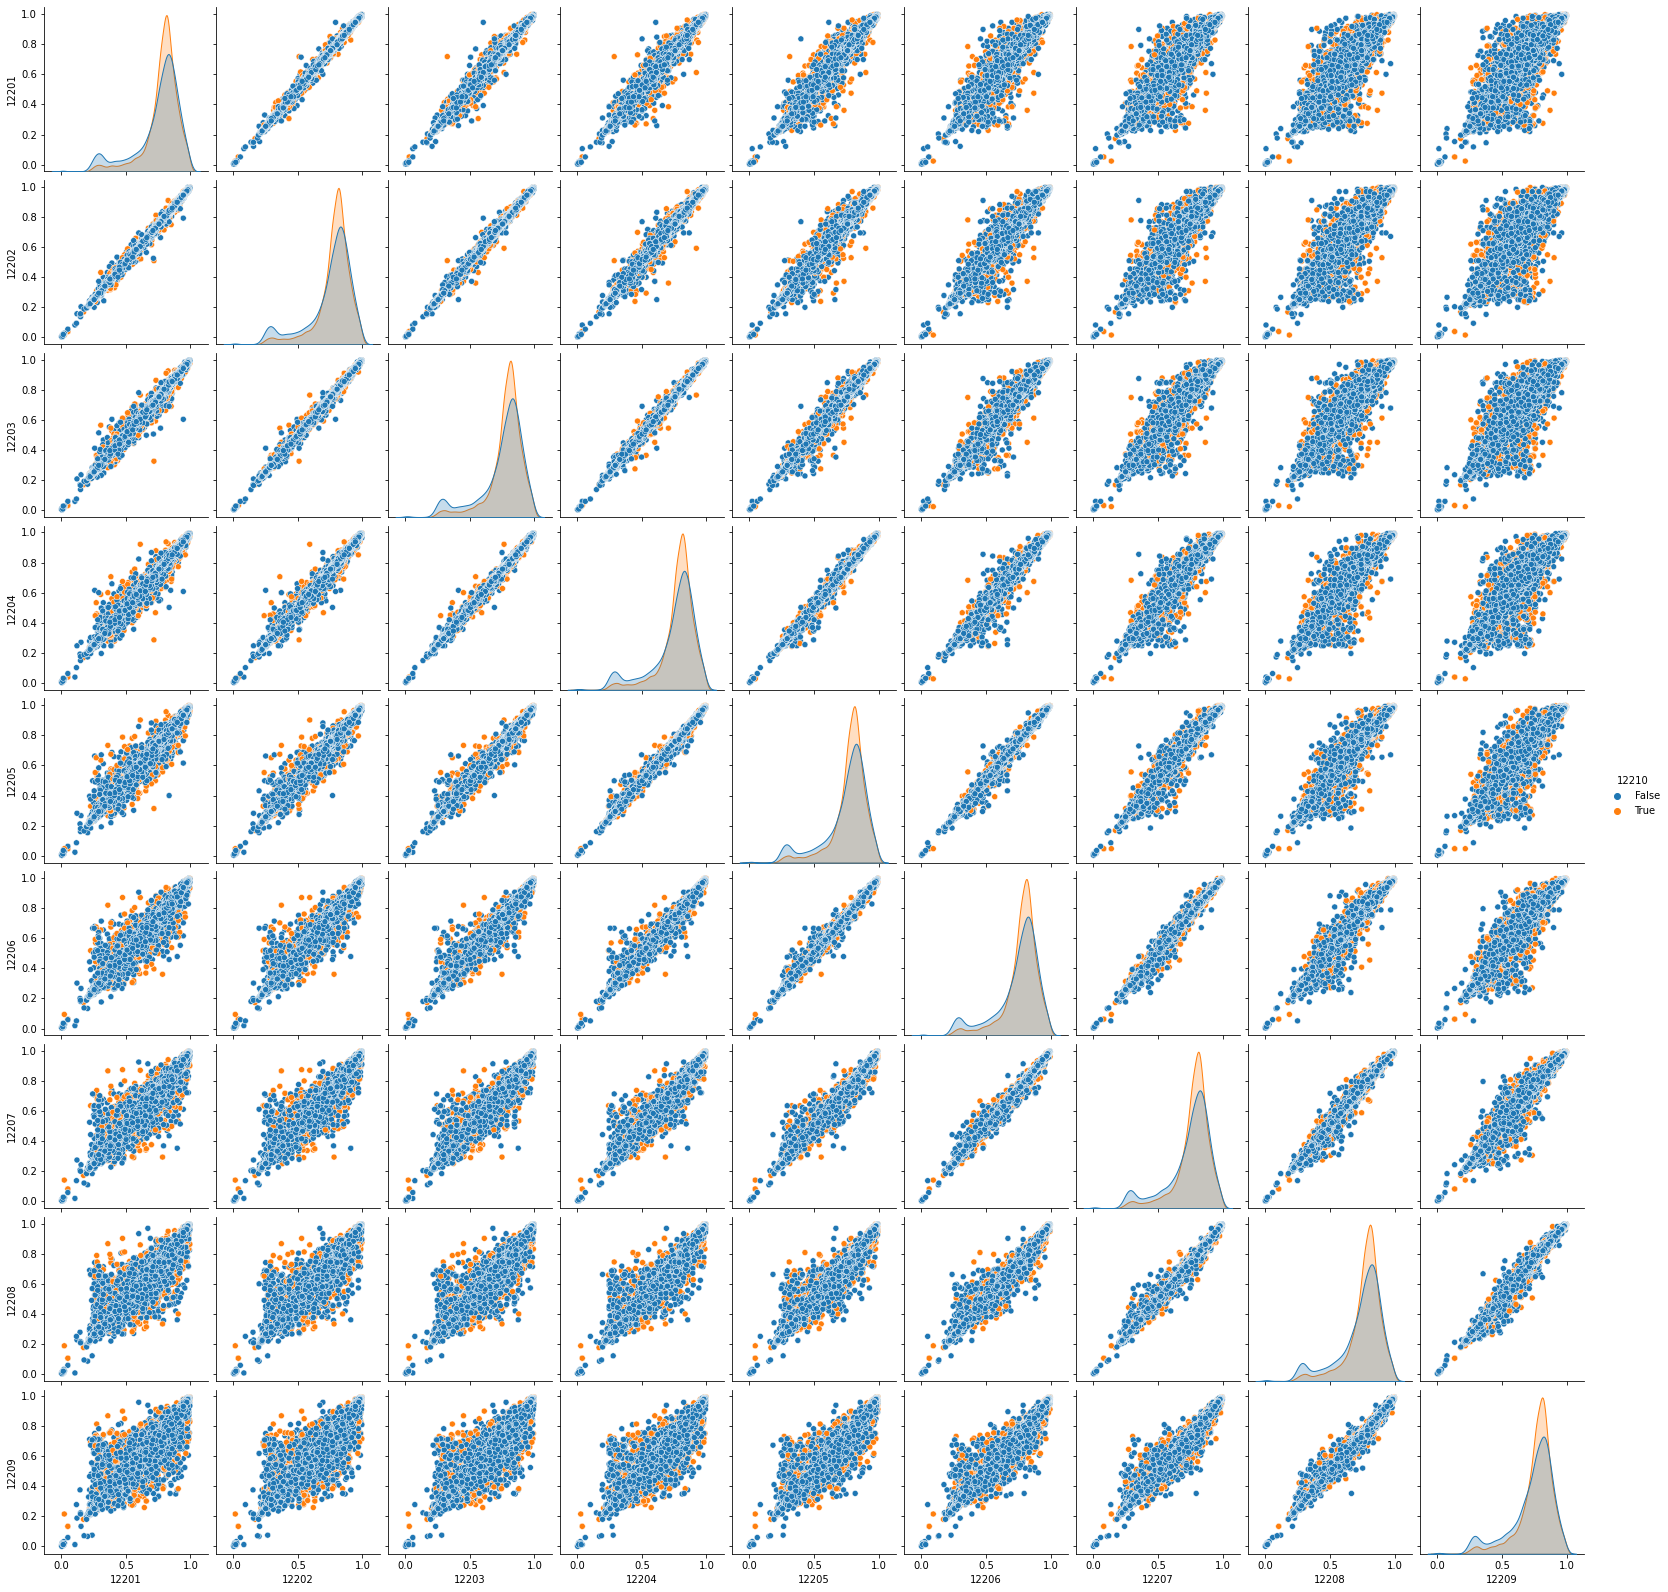

In [ ]:
# Pairplot of some neighboring features
sns.pairplot(data=training_set[training_set.columns[-10:]], hue="12210")

In [ ]:
# Conversion from pandas dataframe to numpy array

y_train = np.array(training_set["12210"]).astype(int)
del training_set["12210"]
X_train = np.array(training_set)

y_val = np.array(validation_set["12210"]).astype(int)
del validation_set["12210"]
X_val = np.array(validation_set)

y_test = np.array(test_set["12210"]).astype(int)
del test_set["12210"]
X_test = np.array(test_set)

In [ ]:
# Standardization

std_scaler = StandardScaler()
X_train_standardized = std_scaler.fit_transform(X_train)
X_val_standardized = std_scaler.transform(X_val)
X_test_standardized = std_scaler.transform(X_test)

### Data Visualization

#### PCA

In [ ]:
num_components = 20
pca = PCA(n_components=num_components)
pca_output = pca.fit_transform(X_train_standardized)

In [ ]:
data = pd.DataFrame()
data["Principal Component 1"] = pca_output[:, 0]
data["Principal Component 2"] = pca_output[:, 1]
data["Principal Component 3"] = pca_output[:, 2]
data['Labels'] = y_train.astype(bool)

print("Explained variance ratio for the first principal components:\n", pca.explained_variance_ratio_)

Explained variance ratio for the first principal components:
 [0.51489811 0.10701952 0.04839518 0.03522197 0.03122888 0.02550728
 0.02085834 0.01729594 0.01405928 0.01382345 0.01093248 0.01021004
 0.00969255 0.00914381 0.00821721 0.00809925 0.00699664 0.00548506
 0.00516701 0.00507597]


First two principal components


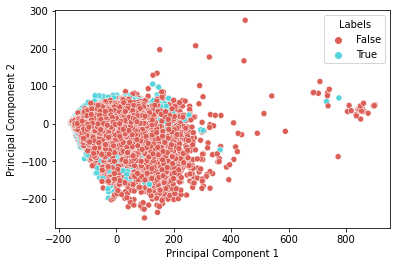

In [ ]:
# 2D plot

sns.scatterplot(
    x="Principal Component 1", 
    y="Principal Component 2",
    palette=sns.color_palette("hls", 2),
    hue="Labels",
    data=data,
    legend="full")

print("First two principal components")

First three principal components


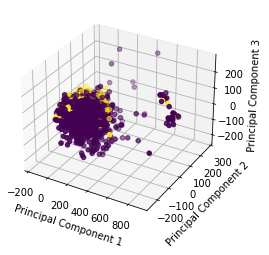

In [ ]:
# 3D plot

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(
    xs=data["Principal Component 1"], 
    ys=data["Principal Component 2"], 
    zs=data["Principal Component 3"], 
    c=data["Labels"])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

print("First three principal components")

The first twenty principal components needed to capture about 90% of the explained variance


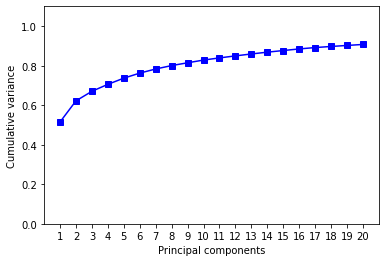

In [ ]:
# Plot of the cumulative variance for the first principal components

x = np.arange(1, num_components + 1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, y, marker='s', color='b')
plt.xlim(0, num_components + 1)
plt.ylim(0., 1.1)
plt.xticks(x)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xlabel('Principal components')
plt.ylabel('Cumulative variance')

print("The first twenty principal components needed to capture about 90% of the explained variance")

#### t-SNE

In [ ]:
tsne = TSNE(n_components=3, init="random", learning_rate="auto")
tsne_output = tsne.fit_transform(X_train_standardized)

In [ ]:
data = pd.DataFrame()
data["x0"] = tsne_output[:, 0]
data["x1"] = tsne_output[:, 1]
data["x2"] = tsne_output[:, 2]
data["Labels"] = y_train.astype(bool)

Two-dimensional representation of the data with t-SNE


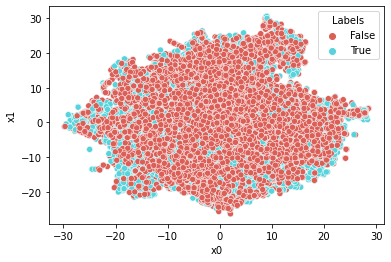

In [ ]:
# 2D plot

sns.scatterplot(
    x="x0",
    y="x1",
    palette=sns.color_palette("hls", 2),
    hue="Labels",
    data=data,
    legend="full")

print("Two-dimensional representation of the data with t-SNE")

Three-dimensional representation of the data with t-SNE


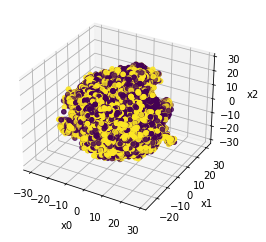

In [ ]:
# 3D plot

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(
    xs=data["x0"], 
    ys=data["x1"], 
    zs=data["x2"], 
    c=data["Labels"])

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

print("Three-dimensional representation of the data with t-SNE")

## Manual Feature Selection

In [ ]:
# Manual feature selection with 3000 features

header = list(range(0, 12210, 4))


# Raw data
X_train = (X_train[:, header])[:, :3000]
X_val = (X_val[:, header])[:, :3000]
X_test = (X_test[:, header])[:, :3000]

print("Raw Data")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("\n")


# Standardized data
X_train_standardized = (X_train_standardized[:, header])[:, :3000]
X_val_standardized = (X_val_standardized[:, header])[:, :3000]
X_test_standardized = (X_test_standardized[:, header])[:, :3000]

print("Standardized Data")
print("X_train_standardized shape:", X_train_standardized.shape)
print("X_val_standardized shape:", X_val_standardized.shape)
print("X_test_standardized shape:", X_test_standardized.shape)

Raw Data
X_train shape: (27960, 3000)
X_val shape: (5648, 3000)
X_test shape: (6436, 3000)


Standardized Data
X_train_standardized shape: (27960, 3000)
X_val_standardized shape: (5648, 3000)
X_test_standardized shape: (6436, 3000)


In [ ]:
# Flags
USE_RAW_DATA = False
USE_TEST_SET = True

In [ ]:
# Shuffle data

if USE_RAW_DATA:
    # Raw data
    X_train, y_train = shuffle(X_train, y_train, random_state=0)
    X_val, y_val = shuffle(X_val, y_val, random_state=0)
    X_test, y_test = shuffle(X_test, y_test, random_state=0)
else:
    # Standardized data
    X_train, y_train = shuffle(X_train_standardized, y_train, random_state=0)
    X_val, y_val = shuffle(X_val_standardized, y_val, random_state=0)
    X_test, y_test = shuffle(X_test_standardized, y_test, random_state=0)

## Machine Learning Approach

### SVM

In [ ]:
clf = svm.SVC(kernel="rbf", gamma="scale", C=10)

clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)

if USE_TEST_SET:
    test_predictions = clf.predict(X_test)


# Results
print("Training set outcome")
print(classification_report(y_train, train_predictions))
print("Confusion matrix\n", confusion_matrix(y_train, train_predictions))
print("\n")

print("Validation set outcome")
print(classification_report(y_val, val_predictions))
print("Confusion matrix\n", confusion_matrix(y_val, val_predictions))
print("\n")

if USE_TEST_SET:
    print("Test set outcome")
    print(classification_report(y_test, test_predictions))
    print("Confusion matrix\n", confusion_matrix(y_test, test_predictions))

Training set outcome
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     13980
           1       0.87      0.94      0.90     13980

    accuracy                           0.90     27960
   macro avg       0.90      0.90      0.90     27960
weighted avg       0.90      0.90      0.90     27960

Confusion matrix
 [[11985  1995]
 [  899 13081]]


Validation set outcome
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2824
           1       0.76      0.81      0.79      2824

    accuracy                           0.78      5648
   macro avg       0.78      0.78      0.78      5648
weighted avg       0.78      0.78      0.78      5648

Confusion matrix
 [[2103  721]
 [ 525 2299]]


Test set outcome
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      3218
           1       0.76      0.83      0.79      3218

    accuracy           

### Random Forest

In [ ]:
clf = ensemble.RandomForestClassifier(n_estimators=1000)

clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)

if USE_TEST_SET:
    test_predictions = clf.predict(X_test)


# Results
print("Training set outcome")
print(classification_report(y_train, train_predictions))
print("Confusion matrix\n", confusion_matrix(y_train, train_predictions))
print("\n")

print("Validation set outcome")
print(classification_report(y_val, val_predictions))
print("Confusion matrix\n", confusion_matrix(y_val, val_predictions))
print("\n")

if USE_TEST_SET:
    print("Test set outcome")
    print(classification_report(y_test, test_predictions))
    print("Confusion matrix\n", confusion_matrix(y_test, test_predictions))

Training set outcome
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13980
           1       1.00      1.00      1.00     13980

    accuracy                           1.00     27960
   macro avg       1.00      1.00      1.00     27960
weighted avg       1.00      1.00      1.00     27960

Confusion matrix
 [[13980     0]
 [    0 13980]]


Validation set outcome
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2824
           1       0.76      0.72      0.74      2824

    accuracy                           0.74      5648
   macro avg       0.74      0.74      0.74      5648
weighted avg       0.74      0.74      0.74      5648

Confusion matrix
 [[2166  658]
 [ 788 2036]]


Test set outcome
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      3218
           1       0.76      0.75      0.76      3218

    accuracy           

## Deep Learning Approach

In [ ]:
leaky_relu = keras.layers.LeakyReLU()

clf = keras.models.Sequential()
clf.add(keras.layers.Dropout(rate=0.1, seed=0, input_shape=(X_train.shape[1],)))
clf.add(keras.layers.Dense(300, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dropout(rate=0.1, seed=0))
clf.add(keras.layers.Dense(200, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dropout(rate=0.1, seed=0))
clf.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dropout(rate=0.1, seed=0))
clf.add(keras.layers.Dense(75, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dropout(rate=0.1, seed=0))
clf.add(keras.layers.Dense(50, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dropout(rate=0.1, seed=0))
clf.add(keras.layers.Dense(25, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dropout(rate=0.1, seed=0))
clf.add(keras.layers.Dense(5, activation=leaky_relu, kernel_initializer=keras.initializers.he_uniform(seed=0)))
clf.add(keras.layers.Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, name='Adam')
clf.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_7 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               900300    
_________________________________________________________________
dropout_8 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)              

In [ ]:
num_epochs = 1000
history = clf.fit(X_train, y_train, epochs=num_epochs, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/1000
219/219 [==============================] - 3s 15ms/step - loss: 0.7017 - accuracy: 0.5541 - val_loss: 0.6497 - val_accuracy: 0.6208
Epoch 2/1000
219/219 [==============================] - 3s 15ms/step - loss: 0.6775 - accuracy: 0.5859 - val_loss: 0.6408 - val_accuracy: 0.6307
Epoch 3/1000
219/219 [==============================] - 3s 15ms/step - loss: 0.6671 - accuracy: 0.6008 - val_loss: 0.6358 - val_accuracy: 0.6342
Epoch 4/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.6601 - accuracy: 0.6085 - val_loss: 0.6319 - val_accuracy: 0.6439
Epoch 5/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.6517 - accuracy: 0.6168 - val_loss: 0.6261 - val_accuracy: 0.6431
Epoch 6/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.6480 - accuracy: 0.6211 - val_loss: 0.6232 - val_accuracy: 0.6496
Epoch 7/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.6449 - accuracy: 0.6213 - val_loss: 0.6197 - val_ac

219/219 [==============================] - 4s 19ms/step - loss: 0.4367 - accuracy: 0.7945 - val_loss: 0.4368 - val_accuracy: 0.7946
Epoch 114/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.4364 - accuracy: 0.7950 - val_loss: 0.4406 - val_accuracy: 0.7951
Epoch 115/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.4352 - accuracy: 0.7955 - val_loss: 0.4372 - val_accuracy: 0.7939
Epoch 116/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.4338 - accuracy: 0.7959 - val_loss: 0.4398 - val_accuracy: 0.7960
Epoch 117/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.4331 - accuracy: 0.7955 - val_loss: 0.4379 - val_accuracy: 0.7944
Epoch 118/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.4331 - accuracy: 0.7965 - val_loss: 0.4387 - val_accuracy: 0.7967
Epoch 119/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.4314 - accuracy: 0.7952 - val_loss: 0.4348 - val_acc

Epoch 169/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.4040 - accuracy: 0.8120 - val_loss: 0.4251 - val_accuracy: 0.8052
Epoch 170/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.4065 - accuracy: 0.8088 - val_loss: 0.4245 - val_accuracy: 0.8091
Epoch 171/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.4103 - accuracy: 0.8102 - val_loss: 0.4227 - val_accuracy: 0.8074
Epoch 172/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.4106 - accuracy: 0.8110 - val_loss: 0.4249 - val_accuracy: 0.8040
Epoch 173/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.4029 - accuracy: 0.8138 - val_loss: 0.4239 - val_accuracy: 0.8067
Epoch 174/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.4021 - accuracy: 0.8117 - val_loss: 0.4210 - val_accuracy: 0.8118
Epoch 175/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.4027 - accuracy: 0.8171 - val_loss: 0

Epoch 225/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3829 - accuracy: 0.8232 - val_loss: 0.4171 - val_accuracy: 0.8107
Epoch 226/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.3839 - accuracy: 0.8242 - val_loss: 0.4173 - val_accuracy: 0.8141
Epoch 227/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.3854 - accuracy: 0.8234 - val_loss: 0.4174 - val_accuracy: 0.8113
Epoch 228/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.3896 - accuracy: 0.8211 - val_loss: 0.4160 - val_accuracy: 0.8123
Epoch 229/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.3798 - accuracy: 0.8248 - val_loss: 0.4193 - val_accuracy: 0.8137
Epoch 230/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3840 - accuracy: 0.8245 - val_loss: 0.4202 - val_accuracy: 0.8097
Epoch 231/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.3804 - accuracy: 0.8258 - val_loss: 0

Epoch 281/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.3662 - accuracy: 0.8320 - val_loss: 0.4138 - val_accuracy: 0.8134
Epoch 282/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3664 - accuracy: 0.8352 - val_loss: 0.4121 - val_accuracy: 0.8155
Epoch 283/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3697 - accuracy: 0.8344 - val_loss: 0.4111 - val_accuracy: 0.8157
Epoch 284/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3707 - accuracy: 0.8313 - val_loss: 0.4083 - val_accuracy: 0.8157
Epoch 285/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3673 - accuracy: 0.8332 - val_loss: 0.4143 - val_accuracy: 0.8121
Epoch 286/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3679 - accuracy: 0.8339 - val_loss: 0.4133 - val_accuracy: 0.8143
Epoch 287/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3694 - accuracy: 0.8305 - val_loss: 0

Epoch 337/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3527 - accuracy: 0.8394 - val_loss: 0.4065 - val_accuracy: 0.8198
Epoch 338/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.3492 - accuracy: 0.8422 - val_loss: 0.4070 - val_accuracy: 0.8221
Epoch 339/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3566 - accuracy: 0.8373 - val_loss: 0.4050 - val_accuracy: 0.8191
Epoch 340/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3512 - accuracy: 0.8418 - val_loss: 0.4085 - val_accuracy: 0.8196
Epoch 341/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3524 - accuracy: 0.8402 - val_loss: 0.4086 - val_accuracy: 0.8199
Epoch 342/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3505 - accuracy: 0.8414 - val_loss: 0.4071 - val_accuracy: 0.8206
Epoch 343/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3511 - accuracy: 0.8432 - val_loss: 0

Epoch 393/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3390 - accuracy: 0.8485 - val_loss: 0.4086 - val_accuracy: 0.8203
Epoch 394/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3390 - accuracy: 0.8509 - val_loss: 0.4096 - val_accuracy: 0.8178
Epoch 395/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3361 - accuracy: 0.8484 - val_loss: 0.4108 - val_accuracy: 0.8183
Epoch 396/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3404 - accuracy: 0.8477 - val_loss: 0.4077 - val_accuracy: 0.8249
Epoch 397/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3376 - accuracy: 0.8499 - val_loss: 0.4090 - val_accuracy: 0.8235
Epoch 398/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3409 - accuracy: 0.8475 - val_loss: 0.4090 - val_accuracy: 0.8228
Epoch 399/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.3435 - accuracy: 0.8463 - val_loss: 0

Epoch 449/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.3321 - accuracy: 0.8523 - val_loss: 0.4052 - val_accuracy: 0.8233
Epoch 450/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3302 - accuracy: 0.8530 - val_loss: 0.4047 - val_accuracy: 0.8249
Epoch 451/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3324 - accuracy: 0.8519 - val_loss: 0.4067 - val_accuracy: 0.8281
Epoch 452/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3277 - accuracy: 0.8516 - val_loss: 0.4082 - val_accuracy: 0.8244
Epoch 453/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.3235 - accuracy: 0.8583 - val_loss: 0.4065 - val_accuracy: 0.8277
Epoch 454/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.3253 - accuracy: 0.8531 - val_loss: 0.4104 - val_accuracy: 0.8219
Epoch 455/1000
219/219 [==============================] - 4s 16ms/step - loss: 0.3274 - accuracy: 0.8546 - val_loss: 0

Epoch 505/1000
219/219 [==============================] - 5s 25ms/step - loss: 0.3196 - accuracy: 0.8589 - val_loss: 0.4060 - val_accuracy: 0.8245
Epoch 506/1000
219/219 [==============================] - 5s 21ms/step - loss: 0.3185 - accuracy: 0.8580 - val_loss: 0.4078 - val_accuracy: 0.8260
Epoch 507/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.3207 - accuracy: 0.8584 - val_loss: 0.4045 - val_accuracy: 0.8290
Epoch 508/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.3201 - accuracy: 0.8572 - val_loss: 0.4061 - val_accuracy: 0.8238
Epoch 509/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3163 - accuracy: 0.8585 - val_loss: 0.4073 - val_accuracy: 0.8242
Epoch 510/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.3164 - accuracy: 0.8590 - val_loss: 0.4024 - val_accuracy: 0.8288
Epoch 511/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.3146 - accuracy: 0.8617 - val_loss: 0

Epoch 561/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3126 - accuracy: 0.8651 - val_loss: 0.4065 - val_accuracy: 0.8265
Epoch 562/1000
219/219 [==============================] - 5s 24ms/step - loss: 0.3055 - accuracy: 0.8650 - val_loss: 0.4103 - val_accuracy: 0.8286
Epoch 563/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3064 - accuracy: 0.8668 - val_loss: 0.4066 - val_accuracy: 0.8275
Epoch 564/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3121 - accuracy: 0.8625 - val_loss: 0.4098 - val_accuracy: 0.8267
Epoch 565/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3050 - accuracy: 0.8674 - val_loss: 0.4139 - val_accuracy: 0.8235
Epoch 566/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.4092 - val_accuracy: 0.8274
Epoch 567/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.3084 - accuracy: 0.8660 - val_loss: 0

Epoch 617/1000
219/219 [==============================] - 6s 26ms/step - loss: 0.2986 - accuracy: 0.8676 - val_loss: 0.4083 - val_accuracy: 0.8306
Epoch 618/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3027 - accuracy: 0.8643 - val_loss: 0.4101 - val_accuracy: 0.8263
Epoch 619/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.2947 - accuracy: 0.8699 - val_loss: 0.4085 - val_accuracy: 0.8300
Epoch 620/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.3021 - accuracy: 0.8676 - val_loss: 0.4110 - val_accuracy: 0.8270
Epoch 621/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2998 - accuracy: 0.8696 - val_loss: 0.4169 - val_accuracy: 0.8268
Epoch 622/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.3013 - accuracy: 0.8671 - val_loss: 0.4107 - val_accuracy: 0.8307
Epoch 623/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.3044 - accuracy: 0.8683 - val_loss: 0

Epoch 673/1000
219/219 [==============================] - 6s 26ms/step - loss: 0.2972 - accuracy: 0.8682 - val_loss: 0.4092 - val_accuracy: 0.8306
Epoch 674/1000
219/219 [==============================] - 6s 25ms/step - loss: 0.2929 - accuracy: 0.8718 - val_loss: 0.4084 - val_accuracy: 0.8306
Epoch 675/1000
219/219 [==============================] - 6s 26ms/step - loss: 0.2909 - accuracy: 0.8731 - val_loss: 0.4146 - val_accuracy: 0.8279
Epoch 676/1000
219/219 [==============================] - 6s 26ms/step - loss: 0.2936 - accuracy: 0.8719 - val_loss: 0.4150 - val_accuracy: 0.8304
Epoch 677/1000
219/219 [==============================] - 6s 27ms/step - loss: 0.2891 - accuracy: 0.8749 - val_loss: 0.4095 - val_accuracy: 0.8337
Epoch 678/1000
219/219 [==============================] - 6s 27ms/step - loss: 0.2881 - accuracy: 0.8737 - val_loss: 0.4121 - val_accuracy: 0.8330
Epoch 679/1000
219/219 [==============================] - 6s 27ms/step - loss: 0.2941 - accuracy: 0.8714 - val_loss: 0

Epoch 729/1000
219/219 [==============================] - 7s 30ms/step - loss: 0.2870 - accuracy: 0.8745 - val_loss: 0.4143 - val_accuracy: 0.8283
Epoch 730/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2842 - accuracy: 0.8755 - val_loss: 0.4150 - val_accuracy: 0.8290
Epoch 731/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.2900 - accuracy: 0.8716 - val_loss: 0.4154 - val_accuracy: 0.8283
Epoch 732/1000
219/219 [==============================] - 4s 17ms/step - loss: 0.2844 - accuracy: 0.8759 - val_loss: 0.4118 - val_accuracy: 0.8297
Epoch 733/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.2842 - accuracy: 0.8738 - val_loss: 0.4181 - val_accuracy: 0.8275
Epoch 734/1000
219/219 [==============================] - 3s 16ms/step - loss: 0.2848 - accuracy: 0.8742 - val_loss: 0.4120 - val_accuracy: 0.8300
Epoch 735/1000
219/219 [==============================] - 3s 15ms/step - loss: 0.2855 - accuracy: 0.8742 - val_loss: 0

Epoch 840/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2709 - accuracy: 0.8828 - val_loss: 0.4211 - val_accuracy: 0.8306
Epoch 841/1000
219/219 [==============================] - 5s 24ms/step - loss: 0.2713 - accuracy: 0.8807 - val_loss: 0.4212 - val_accuracy: 0.8302
Epoch 842/1000
219/219 [==============================] - 4s 20ms/step - loss: 0.2742 - accuracy: 0.8793 - val_loss: 0.4198 - val_accuracy: 0.8318
Epoch 843/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2745 - accuracy: 0.8818 - val_loss: 0.4204 - val_accuracy: 0.8297
Epoch 844/1000
219/219 [==============================] - 6s 27ms/step - loss: 0.2700 - accuracy: 0.8819 - val_loss: 0.4210 - val_accuracy: 0.8332
Epoch 845/1000
219/219 [==============================] - 6s 28ms/step - loss: 0.2728 - accuracy: 0.8823 - val_loss: 0.4256 - val_accuracy: 0.8318
Epoch 846/1000
219/219 [==============================] - 5s 21ms/step - loss: 0.2736 - accuracy: 0.8803 - val_loss: 0

Epoch 896/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2663 - accuracy: 0.8845 - val_loss: 0.4198 - val_accuracy: 0.8302
Epoch 897/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2672 - accuracy: 0.8853 - val_loss: 0.4202 - val_accuracy: 0.8323
Epoch 898/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2668 - accuracy: 0.8857 - val_loss: 0.4188 - val_accuracy: 0.8343
Epoch 899/1000
219/219 [==============================] - 4s 19ms/step - loss: 0.2674 - accuracy: 0.8839 - val_loss: 0.4232 - val_accuracy: 0.8327
Epoch 900/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2647 - accuracy: 0.8845 - val_loss: 0.4220 - val_accuracy: 0.8314
Epoch 901/1000
219/219 [==============================] - 6s 28ms/step - loss: 0.2679 - accuracy: 0.8845 - val_loss: 0.4233 - val_accuracy: 0.8318
Epoch 902/1000
219/219 [==============================] - 6s 25ms/step - loss: 0.2720 - accuracy: 0.8844 - val_loss: 0

Epoch 952/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2622 - accuracy: 0.8880 - val_loss: 0.4234 - val_accuracy: 0.8320
Epoch 953/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2630 - accuracy: 0.8871 - val_loss: 0.4211 - val_accuracy: 0.8313
Epoch 954/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2621 - accuracy: 0.8881 - val_loss: 0.4191 - val_accuracy: 0.8345
Epoch 955/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2638 - accuracy: 0.8856 - val_loss: 0.4206 - val_accuracy: 0.8339
Epoch 956/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2596 - accuracy: 0.8883 - val_loss: 0.4253 - val_accuracy: 0.8318
Epoch 957/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2565 - accuracy: 0.8902 - val_loss: 0.4315 - val_accuracy: 0.8316
Epoch 958/1000
219/219 [==============================] - 4s 18ms/step - loss: 0.2626 - accuracy: 0.8862 - val_loss: 0

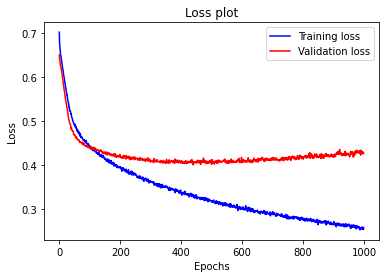

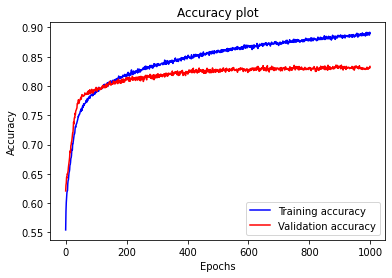

In [ ]:
# Plot loss and accuracy

epochs = range(num_epochs)
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(num_epochs), acc, 'b', label='Training accuracy')
plt.plot(range(num_epochs), val_acc, 'r', label='Validation accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Results

print("Training set outcome")
train_predictions = np.round(clf.predict(X_train))
print(classification_report(y_train, train_predictions))
print("Confusion matrix\n", confusion_matrix(y_train, train_predictions))
print("\n")

print("Validation set outcome")
val_predictions = np.round(clf.predict(X_val))
print(classification_report(y_val, val_predictions))
print("Confusion matrix\n", confusion_matrix(y_val, val_predictions))
print("\n")


if USE_TEST_SET:
    print("Test set outcome")
    test_predictions = np.round(clf.predict(X_test))
    print(classification_report(y_test, test_predictions))
    print("Confusion matrix\n", confusion_matrix(y_test, test_predictions))

Training set outcome
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     13980
           1       0.93      0.95      0.94     13980

    accuracy                           0.94     27960
   macro avg       0.94      0.94      0.94     27960
weighted avg       0.94      0.94      0.94     27960

Confusion matrix
 [[12994   986]
 [  640 13340]]


Validation set outcome
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2824
           1       0.82      0.86      0.84      2824

    accuracy                           0.83      5648
   macro avg       0.83      0.83      0.83      5648
weighted avg       0.83      0.83      0.83      5648

Confusion matrix
 [[2282  542]
 [ 399 2425]]


Test set outcome
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3218
           1       0.83      0.88      0.85      3218

    accuracy           